In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

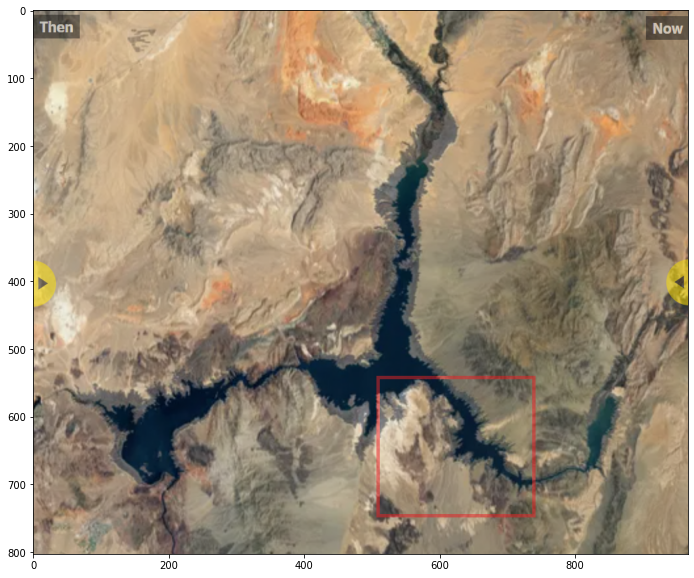

In [2]:
# Superimpose both the images taken in 2000 and 2022 to view the drying up
img_2000 = cv2.imread("lakemead_2000.png")
img_2022 = cv2.imread("lakemead_2022.png")
RGB2000_img = cv2.cvtColor(img_2000, cv2.COLOR_BGR2RGB)
RGB2022_img = cv2.cvtColor(img_2022, cv2.COLOR_BGR2RGB)
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(RGB2000_img, alpha=1)
plt.imshow(RGB2022_img, alpha=0.5)

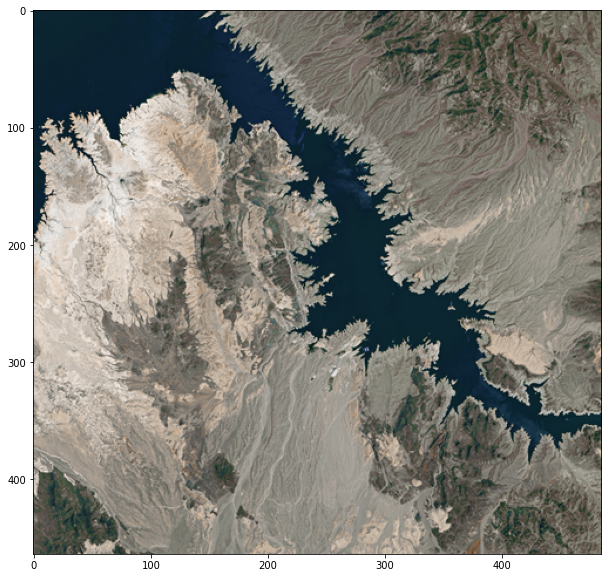

In [3]:
# Since the contour detection will need to be done on high resolution, a smaller region of interest is chosen
img = cv2.imread("lakemead_small.png")
# First, find the dimensions of the Image and clip it based on centroid
(h, w) = img.shape[:2]
# compute the center coordinate of the image
(cX, cY) = (w // 2, h // 2)

# Visualizing the clipped region of interest in Color
RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# output on the clipped color image
out = RGB_img[cY:h, cX:w] # bottomright
f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(out, cmap='gray')

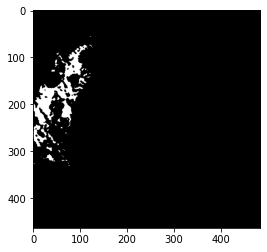

In [4]:
# Image Processing and Contour Detection
imgcopy = out.copy()
gray = cv2.cvtColor(imgcopy, cv2.COLOR_BGR2GRAY)
# Trying to segment the highest intensity of dried up lake bank areas
# Gray Image clipped for all intensities below 180 
gray[gray<180]=0 
# Blur
img_blur = cv2.GaussianBlur(gray, (11, 11), 1)
# Thresholding
ret, thresh = cv2.threshold(img_blur, 200, 255,cv2.THRESH_BINARY) 
# Dilating
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
dilated = cv2.dilate(thresh, kernel, iterations=1) 
# Morphological Operations
k = np.ones((2,2),np.uint8) # current setting
gradient = cv2.morphologyEx(dilated, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)));
plt.imshow(gradient, cmap='gray')

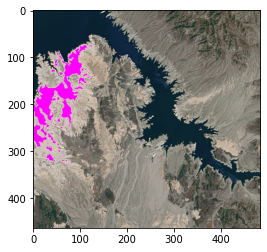

In [5]:
# Detecting Contours
sorted_contours = []
contours = cv2.findContours(gradient, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]
for con in contours:
    epsilon = cv2.arcLength(con,True)
    approx = cv2.approxPolyDP(con,
                              0.001*epsilon, 
                              True)
    #cv2.drawContours(out, contours=[approx], contourIdx=-1, color=(255, 0, 255), thickness=2) 
    cv2.drawContours(out, contours=[approx], contourIdx=-1, color=(255, 0, 255), thickness=cv2.FILLED)
    sorted_contours.append(con)

plt.imshow(out, cmap='gray')

In [6]:
# RGB Filtering needs to be done to segment the greyer regions (not highest intensity) which are also in the region of the drying lake bank
rgb_next = img.copy()
rgb_next = rgb_next[cY:h, cX:w] # actually bottomright
rgb_next = cv2.cvtColor(rgb_next, cv2.COLOR_BGR2RGB)
rgb_filtered = cv2.inRange(rgb_next, (140, 140, 140), (200, 200, 200))
# Blur
img_blurnext = cv2.GaussianBlur(rgb_filtered, (11, 11), 1)
# Thresholding
retnext, threshnext = cv2.threshold(img_blurnext, 100, 255,cv2.THRESH_BINARY) #current
# Dilating
#kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(1,1))
dilated1 = cv2.dilate(threshnext, kernel, iterations=1) 
# Morphological Operations
k = np.ones((2,2),np.uint8) # current setting
gradient1 = cv2.morphologyEx(dilated1, cv2.MORPH_CLOSE, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3)));

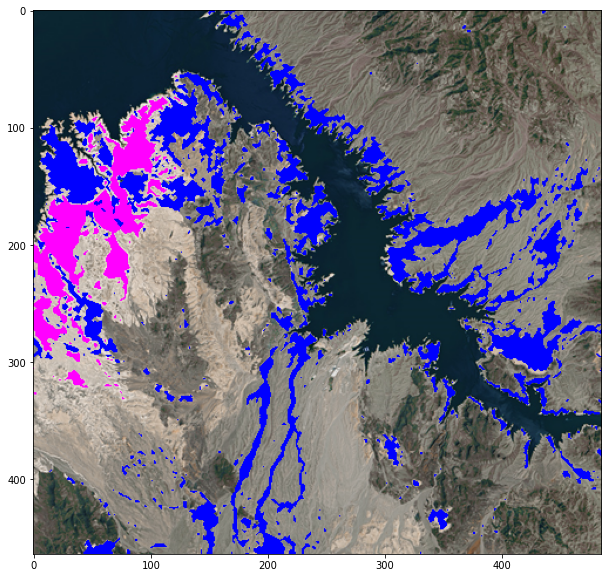

In [7]:
# Detecting Contours
sorted_contours1 = []
# output on the clipped color image
out1 = rgb_next[cY:h, cX:w] # actually bottomright
contours1 = cv2.findContours(gradient1, cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_NONE)[0]
for con in contours1:
    epsilon1 = cv2.arcLength(con,True)
    approx1 = cv2.approxPolyDP(con,
                              0.001*epsilon1, 
                              True)
    # Area filtering done to eliminate interior regions of similar intensity
    if cv2.contourArea(con) < 2500:
        cv2.drawContours(out, contours=[approx1], contourIdx=-1, color=(0, 0, 255), thickness=cv2.FILLED)
        sorted_contours1.append(con)

f = plt.figure()
f.set_figwidth(40)
f.set_figheight(10)
plt.imshow(out, cmap='gray')

C:\Users\Radha\Anaconda3.2021\envs\tfgpu36\lib\site-packages\ipykernel_launcher.py:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  from ipykernel import kernelapp as app


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x22c38f47d30>)

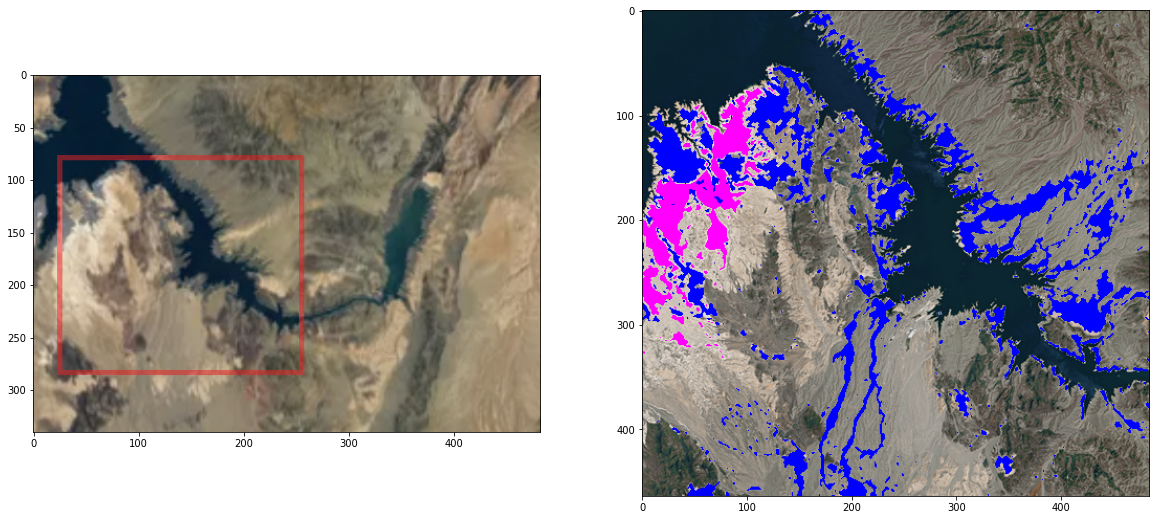

In [8]:
# RGB Filtering
#rgb_filtered = cv2.inRange(img.copy(), (140, 140, 140), (160, 160, 160))
rgb_2000 = img_2000.copy()
rgb_2000 = rgb_2000[cY:h, cX:w] # actually bottomright
rgb_2000 = cv2.cvtColor(rgb_2000, cv2.COLOR_BGR2RGB)
rgb_2022 = img_2022.copy()
rgb_2022 = rgb_2022[cY:h, cX:w] # actually bottomright
rgb_2022 = cv2.cvtColor(rgb_2022, cv2.COLOR_BGR2RGB)
# Compare the results with the originals in sub plots
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)
# plt.imshow(rgb_next)
plt.subplot(121),plt.imshow(rgb_2000, alpha=1)
plt.subplot(121),plt.imshow(rgb_2022, alpha=0.5)
plt.subplot(122),plt.imshow(out, cmap='gray')